in [`gmx editconf`](https://manual.gromacs.org/current/onlinehelp/gmx-editconf.html) command<br>
`-d` arg determined the Distance between the solute and the box<br>
we want fix the system atom number by adjust the `-d` value<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
pdbid = "2jpz"

In [3]:
def get_n_sol(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top > /dev/null 2>&1
    sol = !grep "SOL" topol.top
    n_sol = int(sol[0].split()[1])
    return n_sol

In [4]:
def get_box(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron >editconf.txt 2>&1
    volume = !grep "new box volume" editconf.txt
    volume = float(volume[0].split()[4])
    return volume

In [5]:
def get_n_atoms(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top >solvate.txt 2>&1
    atoms = !grep "Solvent box contains" solvate.txt
    n_atoms = int(atoms[0].split()[3])
    return n_atoms

### Plot d v.s. Volume (linear)

In [6]:
!rm \#topol.top* \#{pdbid}*
d2volume = {}
for d in tqdm(np.linspace(1.02, 1.032, 51)):
    volume = get_box(d)
    d2volume[np.round(d, decimals=15)] = volume

100%|███████████████████████████████████████████| 51/51 [00:27<00:00,  1.88it/s]


Text(0, 0.5, 'volume')

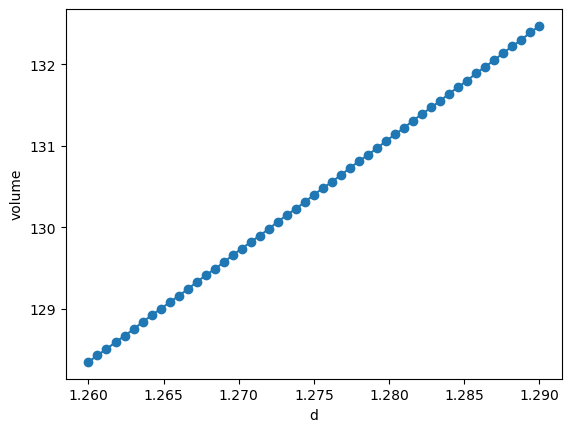

In [7]:
plt.plot(d2volume.keys(), d2volume.values())
plt.scatter(d2volume.keys(), d2volume.values())
plt.xlabel('d')
plt.ylabel('volume')

### Plot d v.s. n_sol (non-linear)
in wtTel22, we want fix n_sol = **3858**

In [32]:
!rm \#topol.top* \#{pdbid}*
d2n_sol = {}
for d in tqdm(np.linspace(1.02, 1.032, 51)):
    n_sol = get_n_sol(d)
    d2n_sol[np.round(d, decimals=15)] = n_sol

100%|███████████████████████████████████████████| 51/51 [00:43<00:00,  1.17it/s]


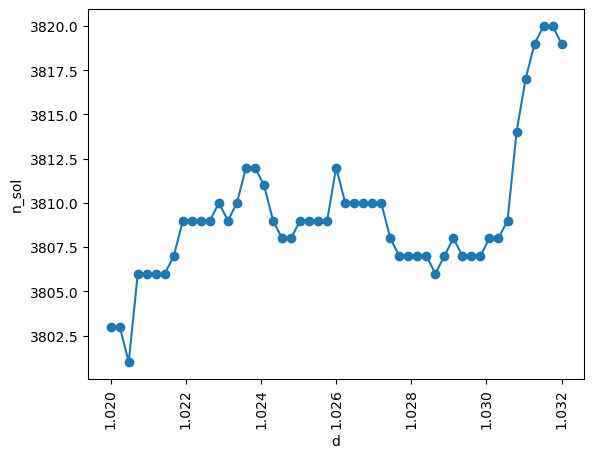

In [33]:
plt.plot(d2n_sol.keys(), d2n_sol.values())
plt.scatter(d2n_sol.keys(), d2n_sol.values())
plt.xlabel('d')
plt.ylabel('n_sol')
plt.xticks(rotation=90)
plt.show()

In [34]:
d2n_sol

{1.02: 3803,
 1.02024: 3803,
 1.02048: 3801,
 1.02072: 3806,
 1.02096: 3806,
 1.0212: 3806,
 1.02144: 3806,
 1.02168: 3807,
 1.02192: 3809,
 1.02216: 3809,
 1.0224: 3809,
 1.02264: 3809,
 1.02288: 3810,
 1.02312: 3809,
 1.02336: 3810,
 1.0236: 3812,
 1.02384: 3812,
 1.02408: 3811,
 1.02432: 3809,
 1.02456: 3808,
 1.0248: 3808,
 1.02504: 3809,
 1.02528: 3809,
 1.02552: 3809,
 1.02576: 3809,
 1.026: 3812,
 1.02624: 3810,
 1.02648: 3810,
 1.02672: 3810,
 1.02696: 3810,
 1.0272: 3810,
 1.02744: 3808,
 1.02768: 3807,
 1.02792: 3807,
 1.02816: 3807,
 1.0284: 3807,
 1.02864: 3806,
 1.02888: 3807,
 1.02912: 3808,
 1.02936: 3807,
 1.0296: 3807,
 1.02984: 3807,
 1.03008: 3808,
 1.03032: 3808,
 1.03056: 3809,
 1.0308: 3814,
 1.03104: 3817,
 1.03128: 3819,
 1.03152: 3820,
 1.03176: 3820,
 1.032: 3819}